# Store Sales - Exploratory Data Analysis (EDA)

The notebook is intended to explore the Time Series contained in `data/store_sales`:
- `stores.csv` - It contains metadata about the stores (city, state, type and cluster)
- `oil.csv` - It contains information about daily oil price
- `holidays_events.csv` - It contains information about national holidays
- `transactions.csv` - it contains information about the number of transaction of each store
- `train.csv` - It contains information about the amount of sales of each store


**NOTE:** Ensure to download also the `train.csv` from the following Kaggle Competition: [Stores Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data).

# Setup Notebook

## Imports

In [10]:
# Import Standard Libraries
from pathlib import Path
from dynaconf import Dynaconf
import os
import pandas as pd

# Import Package Modules
from src.exploratory_data_analysis.exploratory_data_analysis_utils import (
    plot_time_series,
    set_plot_characteristics,
    plot_regression_plot
)
from src.data_preparation.data_preparation_utils import (
    group_avg_column_by_frequency, 
    add_dummy_time_step,
    add_lag_feature
)

## Define Configurations

In [2]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read EDA configuration
config = Dynaconf(settings_files=[root_path / 'configuration' / 'store_sales_config.toml'], environment=True, env='eda')

# Extract configurations
data_paths = config['data_paths']

## Set Plots Characteristics

In [3]:
set_plot_characteristics(config['plot_settings'])

[09/21/2024 16:22:35 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Start
[09/21/2024 16:22:35 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Creating theme parameters
[09/21/2024 16:22:35 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - End


# Read Data

In [4]:
# Read data with parse dates
holidays_data = pd.read_csv(root_path / data_paths['holidays_data'], parse_dates=['date'], date_format='%Y-%m-%d')
oil_data = pd.read_csv(root_path / data_paths['oil_data'], parse_dates=['date'], date_format='%Y-%m-%d')
stores_data = pd.read_csv(root_path / data_paths['stores_data'])
transactions_data = pd.read_csv(root_path / data_paths['transactions_data'], parse_dates=['date'], date_format='%Y-%m-%d')
train_data = pd.read_csv(root_path / data_paths['train_data'], parse_dates=['date'], date_format='%Y-%m-%d')
test_data = pd.read_csv(root_path / data_paths['test_data'], parse_dates=['date'], date_format='%Y-%m-%d')

# Exploratory Data Analysis

## Time Series Plots

### Oil Price

[09/20/2024 14:30:52 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/20/2024 14:30:52 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/20/2024 14:30:52 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/20/2024 14:30:52 - exploratory_data_analysis_utils] INFO - plot_time_series - End


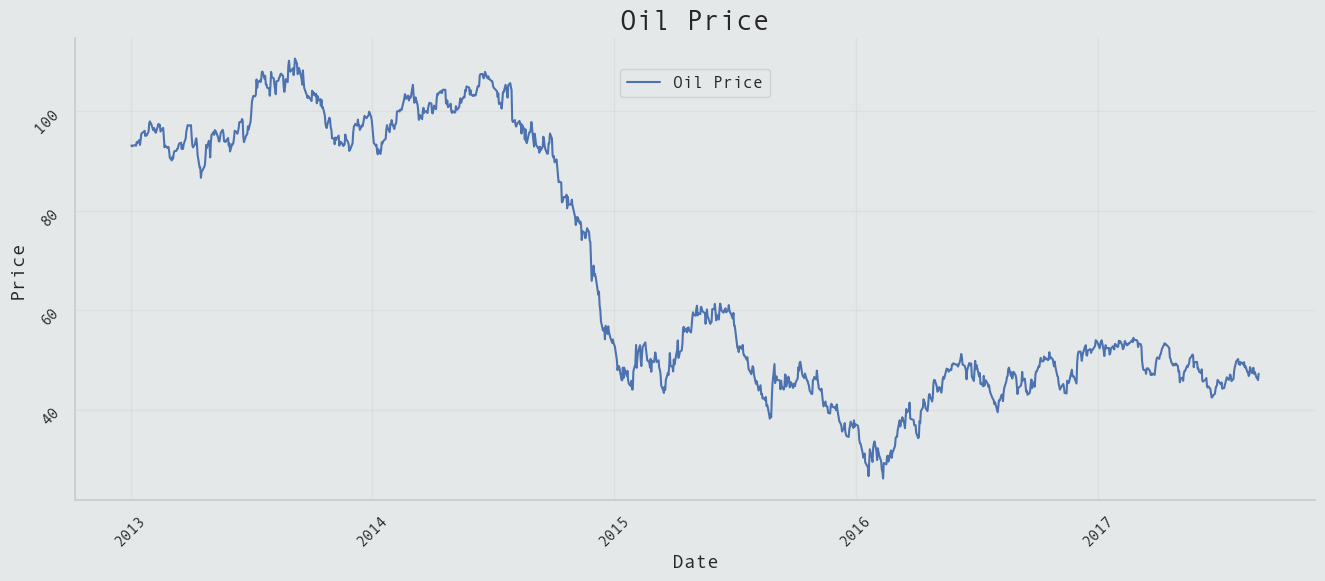

In [10]:
_ = plot_time_series(time_series=oil_data, columns=('date', 'dcoilwtico'), title='Oil Price', labels=('Date', 'Price', 'Oil Price'), to_plot=False)

### Transactions

[09/20/2024 14:33:33 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/20/2024 14:33:33 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/20/2024 14:33:57 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/20/2024 14:33:57 - exploratory_data_analysis_utils] INFO - plot_time_series - End


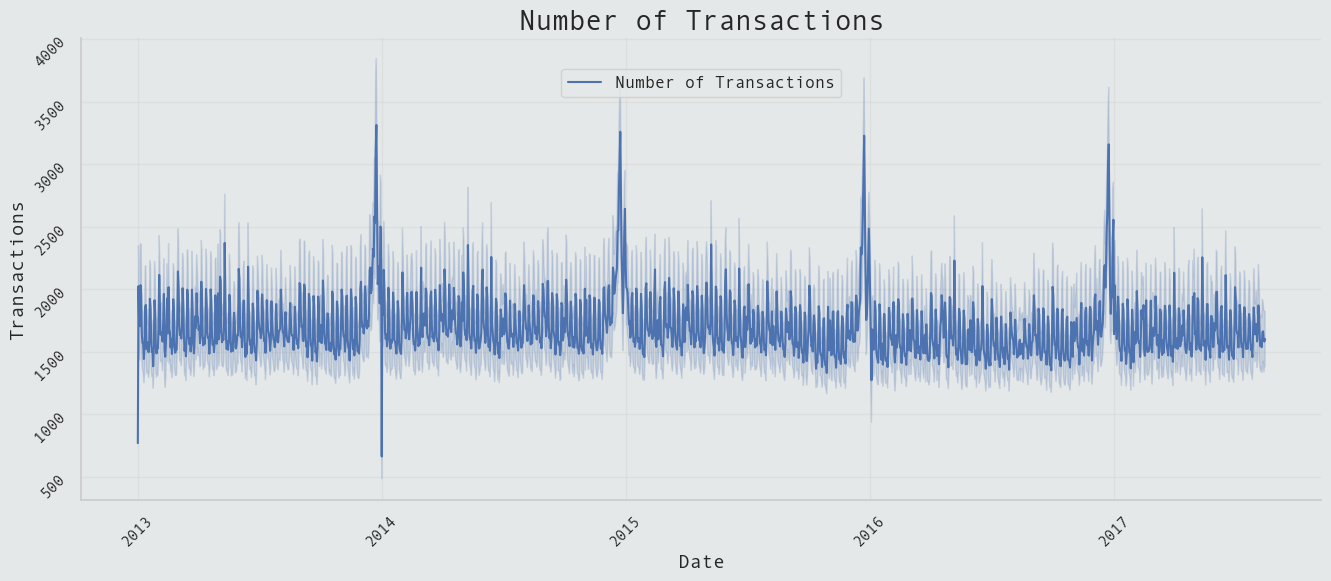

In [12]:
_ = plot_time_series(time_series=transactions_data, columns=('date', 'transactions'), title='Number of Transactions', 
                     labels=('Date', 'Transactions', 'Number of Transactions'), to_plot=False)

[09/20/2024 14:41:08 - data_preparation_utils] INFO - group_avg_column_by_frequency - Start
[09/20/2024 14:41:08 - data_preparation_utils] INFO - group_avg_column_by_frequency - key: date | frequency: W | column: transactions
[09/20/2024 14:41:08 - data_preparation_utils] INFO - group_avg_column_by_frequency - End
[09/20/2024 14:41:08 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/20/2024 14:41:08 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/20/2024 14:41:08 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/20/2024 14:41:08 - exploratory_data_analysis_utils] INFO - plot_time_series - End


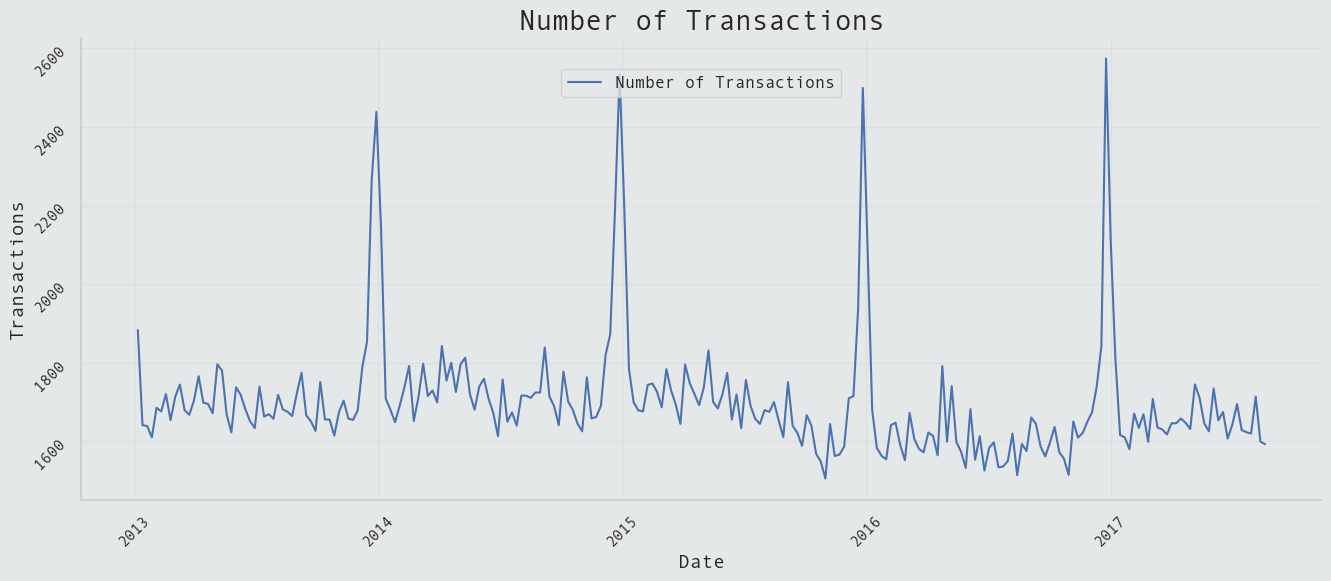

In [14]:
# Group transactions by week
transactions_data_weekly = group_avg_column_by_frequency(data=transactions_data, key='date', column='transactions', frequency='W')

_ = plot_time_series(time_series=transactions_data_weekly, 
                     columns=('date', 'transactions'), title='Number of Transactions', 
                     labels=('Date', 'Transactions', 'Number of Transactions'), to_plot=False)

### Sales

[09/20/2024 14:42:13 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/20/2024 14:42:13 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/20/2024 14:43:00 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/20/2024 14:43:00 - exploratory_data_analysis_utils] INFO - plot_time_series - End


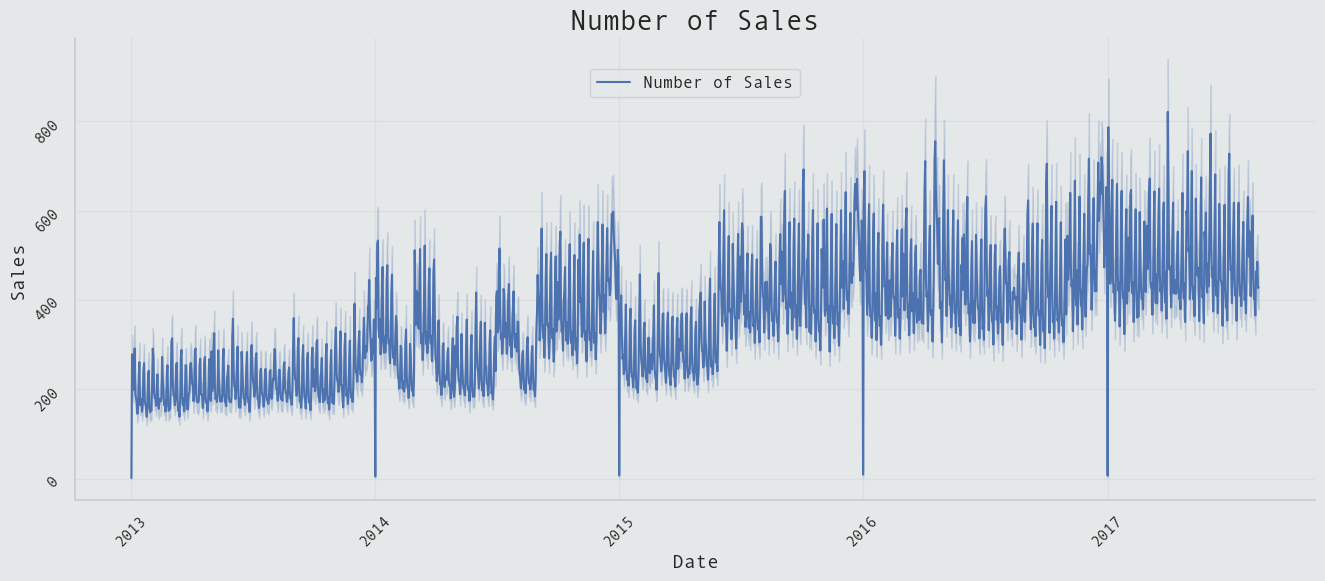

In [16]:
_ = plot_time_series(time_series=train_data, 
                     columns=('date', 'sales'), title='Number of Sales', 
                     labels=('Date', 'Sales', 'Number of Sales'), to_plot=False)

[09/20/2024 14:43:39 - data_preparation_utils] INFO - group_avg_column_by_frequency - Start
[09/20/2024 14:43:39 - data_preparation_utils] INFO - group_avg_column_by_frequency - key: date | frequency: W | column: sales
[09/20/2024 14:43:39 - data_preparation_utils] INFO - group_avg_column_by_frequency - End
[09/20/2024 14:43:39 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/20/2024 14:43:39 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/20/2024 14:43:39 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/20/2024 14:43:39 - exploratory_data_analysis_utils] INFO - plot_time_series - End


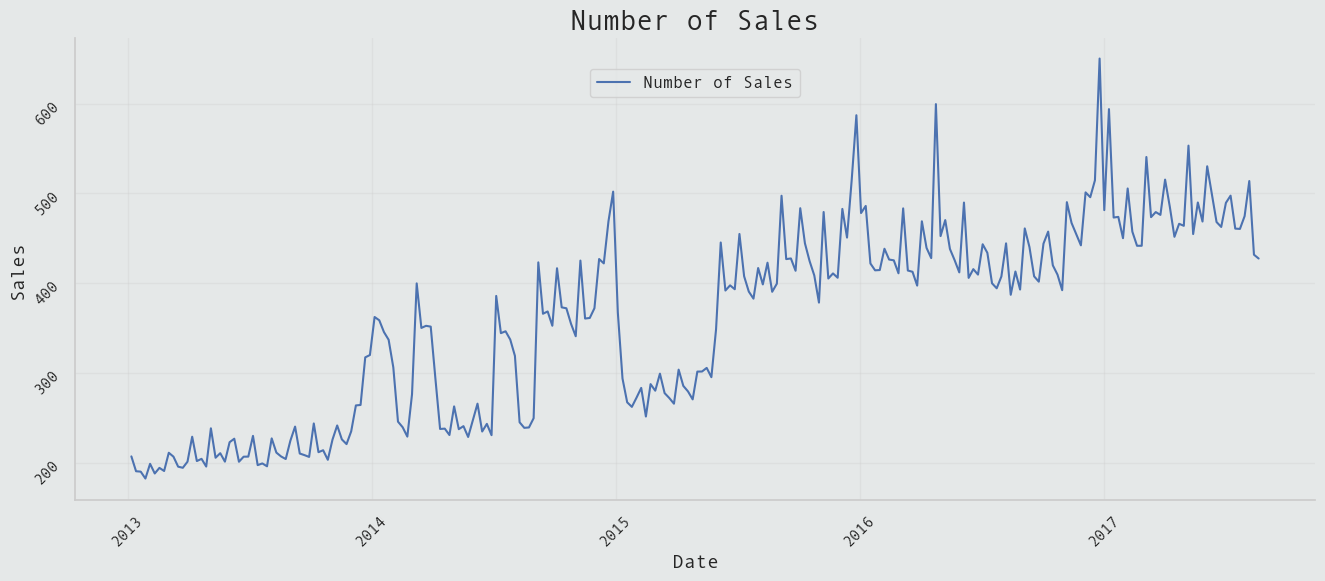

In [17]:
# Group sales by week
train_data_weekly = group_avg_column_by_frequency(data=train_data, key='date', column='sales', frequency='W')

_ = plot_time_series(time_series=train_data_weekly, 
                     columns=('date', 'sales'), title='Number of Sales', 
                     labels=('Date', 'Sales', 'Number of Sales'), to_plot=False)

## Regression Plots

### Time-Step Feature

In [5]:
# Group sales by week
train_data_weekly = group_avg_column_by_frequency(data=train_data, key='date', column='sales', frequency='W')

# Group sales by month
train_data_monthly = group_avg_column_by_frequency(data=train_data, key='date', column='sales', frequency='ME')

[09/21/2024 16:22:38 - data_preparation_utils] INFO - group_avg_column_by_frequency - Start
[09/21/2024 16:22:38 - data_preparation_utils] INFO - group_avg_column_by_frequency - key: date | frequency: W | column: sales
[09/21/2024 16:22:38 - data_preparation_utils] INFO - group_avg_column_by_frequency - End
[09/21/2024 16:22:38 - data_preparation_utils] INFO - group_avg_column_by_frequency - Start
[09/21/2024 16:22:38 - data_preparation_utils] INFO - group_avg_column_by_frequency - key: date | frequency: ME | column: sales
[09/21/2024 16:22:39 - data_preparation_utils] INFO - group_avg_column_by_frequency - End


In [6]:
# Add time-step feature
train_data_weekly = add_dummy_time_step(data=train_data_weekly)
train_data_monthly = add_dummy_time_step(data=train_data_monthly)

[09/21/2024 16:22:39 - data_preparation_utils] INFO - add_dummy_time_step - Start
[09/21/2024 16:22:39 - data_preparation_utils] INFO - add_dummy_time_step - column_name: time_step
[09/21/2024 16:22:39 - data_preparation_utils] INFO - add_dummy_time_step - End
[09/21/2024 16:22:39 - data_preparation_utils] INFO - add_dummy_time_step - Start
[09/21/2024 16:22:39 - data_preparation_utils] INFO - add_dummy_time_step - column_name: time_step
[09/21/2024 16:22:39 - data_preparation_utils] INFO - add_dummy_time_step - End


[09/21/2024 16:23:15 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Start
[09/21/2024 16:23:15 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Plot time series
[09/21/2024 16:23:15 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/21/2024 16:23:15 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/21/2024 16:23:15 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/21/2024 16:23:15 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[09/21/2024 16:23:15 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Plot regression plot
[09/21/2024 16:23:15 - exploratory_data_analysis_utils] INFO - plot_regression_plot - End


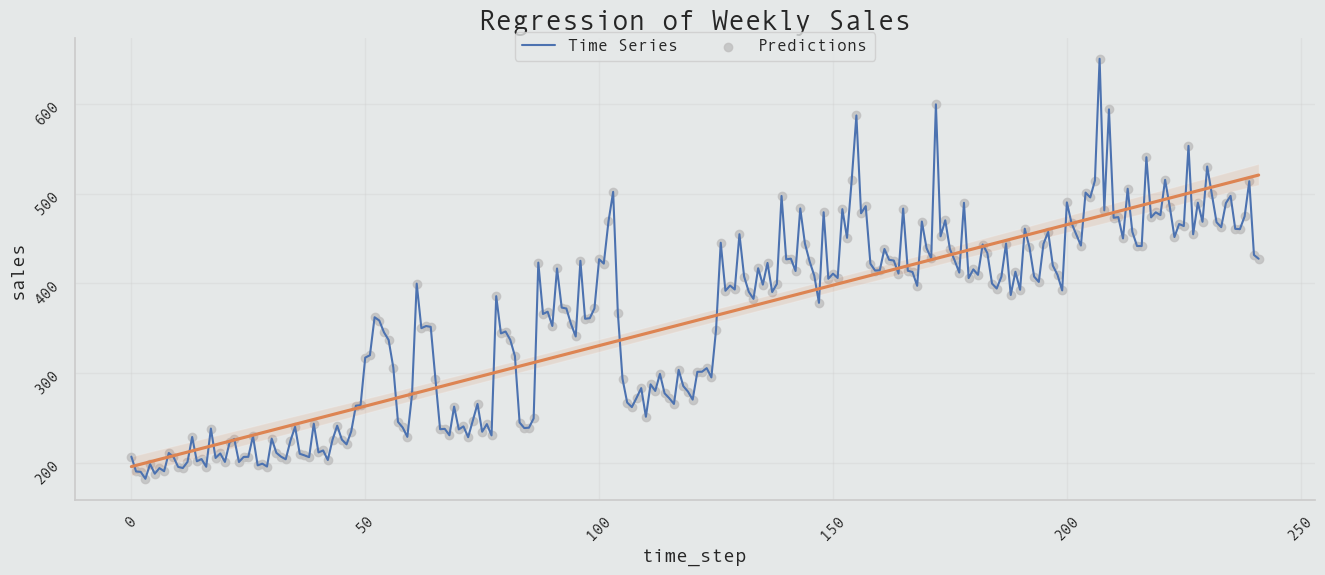

In [8]:
_ = plot_regression_plot(data=train_data_weekly, 
                         columns=('time_step', 'sales'), 
                         title='Regression of Weekly Sales', 
                         labels=('Time', 'Sales'), 
                         to_plot=False)

[09/21/2024 16:23:50 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Start
[09/21/2024 16:23:50 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Plot time series
[09/21/2024 16:23:50 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/21/2024 16:23:50 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/21/2024 16:23:50 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/21/2024 16:23:50 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[09/21/2024 16:23:50 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Plot regression plot
[09/21/2024 16:23:50 - exploratory_data_analysis_utils] INFO - plot_regression_plot - End


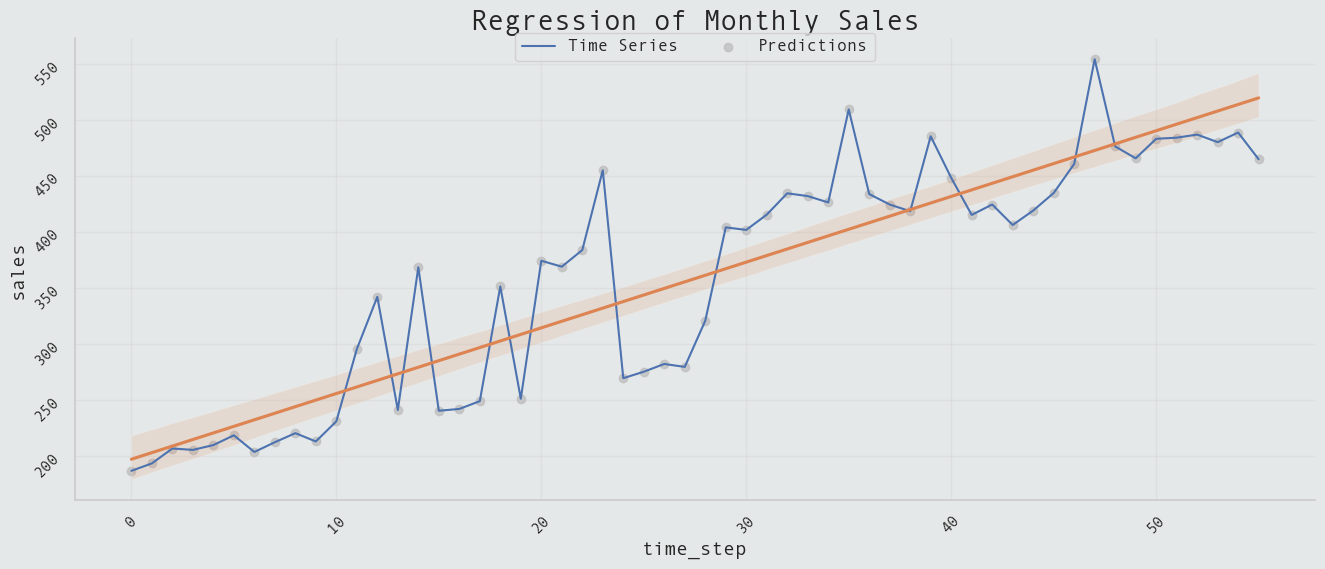

In [9]:
_ = plot_regression_plot(data=train_data_monthly, 
                         columns=('time_step', 'sales'), 
                         title='Regression of Monthly Sales', 
                         labels=('Time', 'Sales'), 
                         to_plot=False)

### Lag Feature

In [14]:
# Add lag feature
train_data_weekly = add_lag_feature(data=train_data_weekly, 
                                    column='sales',
                                    lag=1)
train_data_monthly = add_lag_feature(data=train_data_monthly, 
                                     column='sales', 
                                     lag=1)

[09/21/2024 16:33:19 - data_preparation_utils] INFO - add_lag_feature - Start
[09/21/2024 16:33:19 - data_preparation_utils] INFO - add_lag_feature - column: sales | lag: 1
[09/21/2024 16:33:19 - data_preparation_utils] INFO - add_lag_feature - End
[09/21/2024 16:33:19 - data_preparation_utils] INFO - add_lag_feature - Start
[09/21/2024 16:33:19 - data_preparation_utils] INFO - add_lag_feature - column: sales | lag: 1
[09/21/2024 16:33:19 - data_preparation_utils] INFO - add_lag_feature - End


[09/21/2024 16:35:16 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Start
[09/21/2024 16:35:16 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Plot time series
[09/21/2024 16:35:16 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/21/2024 16:35:16 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/21/2024 16:35:16 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/21/2024 16:35:16 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[09/21/2024 16:35:16 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Plot regression plot
[09/21/2024 16:35:16 - exploratory_data_analysis_utils] INFO - plot_regression_plot - End


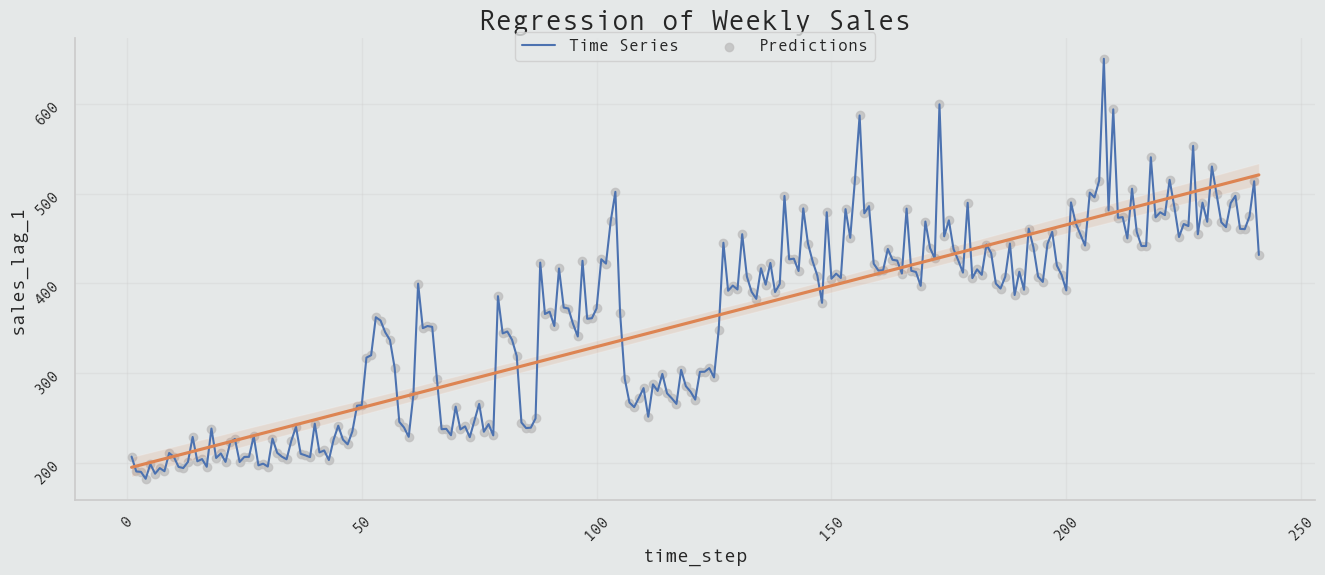

In [16]:
_ = plot_regression_plot(data=train_data_weekly, 
                         columns=('time_step', 'sales_lag_1'), 
                         title='Regression of Weekly Sales', 
                         labels=('Time', 'Sales Lag 1'), 
                         to_plot=False)

[09/21/2024 16:35:37 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Start
[09/21/2024 16:35:37 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Plot time series
[09/21/2024 16:35:37 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[09/21/2024 16:35:37 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[09/21/2024 16:35:37 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[09/21/2024 16:35:37 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[09/21/2024 16:35:37 - exploratory_data_analysis_utils] INFO - plot_regression_plot - Plot regression plot
[09/21/2024 16:35:37 - exploratory_data_analysis_utils] INFO - plot_regression_plot - End


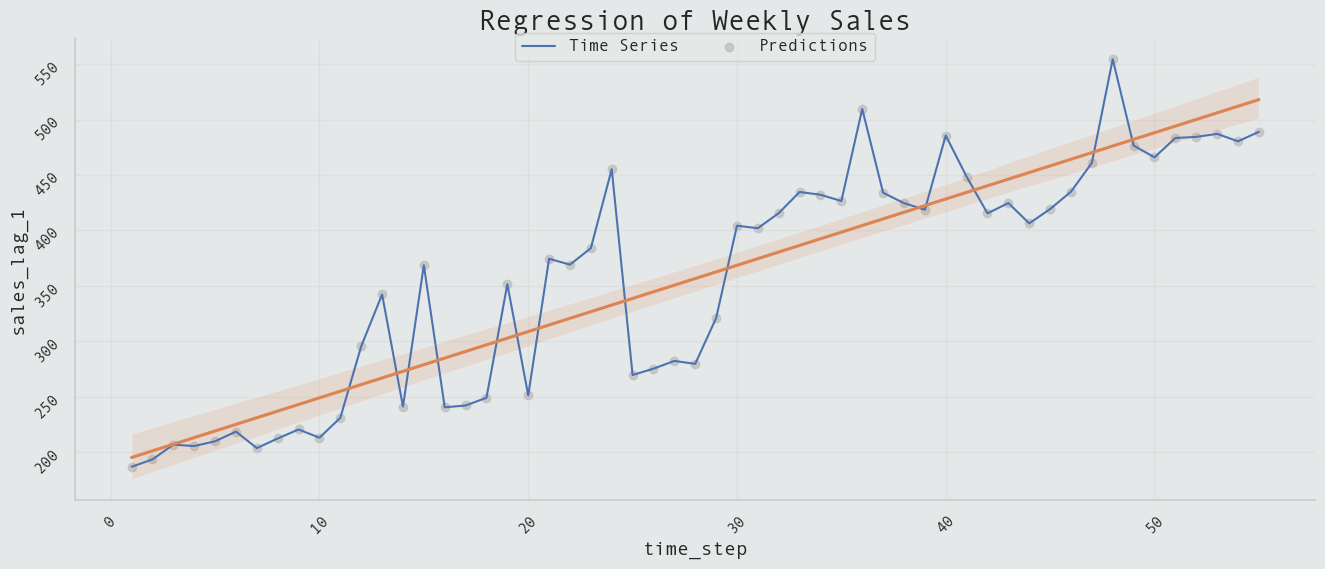

In [17]:
_ = plot_regression_plot(data=train_data_monthly, 
                         columns=('time_step', 'sales_lag_1'), 
                         title='Regression of Weekly Sales', 
                         labels=('Time', 'Sales Lag 1'), 
                         to_plot=False)